# Analisis sexualidad

Importamos los recursos

In [134]:
import pandas as pd
import numpy as np
import sidetable
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
#import mglearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
#import random

In [135]:
def mi_metric(conf_mat):
    sensibilidad = conf_mat[1, 1] / (conf_mat[1, 1] + conf_mat[1, 0])
    especificidad = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
    return sensibilidad, especificidad

def plot_confu(cm):
    # Define las etiquetas de las clases
    classes = ['Clase 0', 'Clase 1']

    # Grafica la matriz de confusión
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Agrega los valores de la matriz en cada celda
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Agrega etiquetas a los ejes
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.tight_layout()
    plt.show()

Importamos los datos

In [136]:
datos = pd.read_csv('datosCalificados.csv',delimiter=";",decimal=',')
datos.head(5)

,Unnamed: 0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,redes_emocion,redes_rutina,extraversion,amabilidad,escrupulo,afect_nega,apertura,maquiavel,narcisis,psicopa
0,1,53959060,Completed,179.15.124.18,2021-08-26 13:48:54,False,849,1,CO,ANT,...,35.106383,60.188968,58.333333,83.333333,83.333333,41.666667,66.666667,36.111111,55.555556,2.777778
1,2,53959737,Completed,191.95.16.235,2021-08-26 14:30:42,False,871,1,CO,ATL,...,25.000000,35.924504,58.333333,75.000000,75.000000,41.666667,75.000000,36.111111,44.444444,25.000000
2,3,53960505,Completed,186.169.203.213,2021-08-26 15:17:42,False,1488,1,CO,ATL,...,70.512291,75.000000,58.333333,50.000000,66.666667,33.333333,66.666667,44.444444,61.111111,16.666667
3,4,53988796,Completed,179.13.234.31,2021-08-29 20:40:08,False,1312,1,CO,SUC,...,40.864887,86.492322,75.000000,75.000000,50.000000,41.666667,66.666667,41.666667,52.777778,16.666667
4,5,54032323,Completed,190.143.54.144,2021-09-01 06:31:17,False,727,1,CO,ATL,...,0.000000,69.537748,66.666667,66.666667,83.333333,50.000000,91.666667,38.888889,72.222222,30.555556


In [137]:
#datos['p126']= datos['p126'].astype("category")
#datos['compromiso'] = np.where(datos['p126'] <=  2, 1,0)

datos['marital1']=np.where(datos['p126'] ==  1, 1,0)
datos['marital2']=np.where(datos['p126'] ==  2, 1,0)
datos['marital3']=np.where(datos['p126'] ==  3, 1,0)
datos['marital4']=np.where(datos['p126'] ==  4, 1,0)
datos['marital5']=np.where(datos['p126'] ==  5, 1,0)


In [138]:
datos.columns.values

array(['Unnamed: 0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18',
       'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27',
       'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36',
       'p37', 'p38', 'p39', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45',
       'p46', 'p47', 'p48', 'p49', 'p50', 'p51', 'p52', 'p53', 'p54',
       'p55', 'p56', 'p57', 'p58', 'p59', 'p60', 'p61', 'p62', 'p63',
       'p64', 'p65', 'p66', 'p67', 'p68', 'p69', 'p70', 'p71', 'p72',
       'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p80', 'p81',
       'p82', 'p83', 'p84', 'p85', 'p86', 'p87', 'p88', 'p89', 'p90',
       'p91', 'p92', 'p93', 'p94', 'p95', 'p96', 'p97', 'p98', 'p99',
       'p100', 'p101', 'p102', 'p103', 'p104', 'p105', 'p106', 'p107',
       'p108', 'p109', 'p110', 'p111', 'p112', 'p113', 'p114', 'p115',
       'p116', 'p117', 'p118', 'p119', 'p120', 'p121', 'p122', 'p123',
       'p124

Frecuencias para estatus marital y genero

In [139]:
pd.value_counts(datos['p126']) # estatus marital

C:\Users\Uninorte\AppData\Local\Temp\ipykernel_6540\541428089.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(datos['p126']) # estatus marital


p126
2    393
5    200
3    125
1     72
4     67
Name: count, dtype: int64

In [140]:
pd.value_counts(datos['p142']) # genero

C:\Users\Uninorte\AppData\Local\Temp\ipykernel_6540\2858894611.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(datos['p142']) # genero


p142
Femenino     503
Masculino    342
Name: count, dtype: int64

In [141]:
datos.stb.freq(['p142','p126'])

,p142,p126,count,percent,cumulative_count,cumulative_percent
0,Femenino,2,243,28.757396,243,28.757396
1,Masculino,2,146,17.278107,389,46.035503
2,Femenino,5,112,13.254438,501,59.289941
3,Masculino,5,85,10.059172,586,69.349112
4,Femenino,3,66,7.810651,652,77.159763
5,Masculino,3,55,6.508876,707,83.668639
6,Femenino,1,50,5.917160,757,89.585799
7,Masculino,4,34,4.023669,791,93.609467
8,Femenino,4,32,3.786982,823,97.396450
9,Masculino,1,22,2.603550,845,100.000000


Contamos valores perdidos en equis y ye

In [142]:
etiq1=['conducta', 'actitud', 'deseo','ImpulsoPropio','funcionSexual','extraversion',
       'amabilidad','escrupulo','afect_nega','apertura','maquiavel','narcisis','psicopa',
       'marital1','marital2','marital3','marital4','marital5','p142','satisIndividual']
datos[etiq1].isnull().transpose().sum().value_counts()
#pd.value_counts(a)

0     830
1      14
2      11
10      1
3       1
Name: count, dtype: int64

Procedemos a eliminar las obervaciones incompletas

In [143]:
a=datos[etiq1].isnull().transpose().sum()
datos=datos[(a==0)]
datos=datos[etiq1]
datos.head(5)


,conducta,actitud,deseo,ImpulsoPropio,funcionSexual,extraversion,amabilidad,escrupulo,afect_nega,apertura,maquiavel,narcisis,psicopa,marital1,marital2,marital3,marital4,marital5,p142,satisIndividual
0,33.365759,15.744681,25.000000,33.333333,75.000000,58.333333,83.333333,83.333333,41.666667,66.666667,36.111111,55.555556,2.777778,0,1,0,0,0,Femenino,75.000000
1,16.731518,25.000000,0.000000,38.888889,50.000000,58.333333,75.000000,75.000000,41.666667,75.000000,36.111111,44.444444,25.000000,1,0,0,0,0,Masculino,70.541480
2,92.120623,75.000000,59.426230,55.555556,50.000000,58.333333,50.000000,66.666667,33.333333,66.666667,44.444444,61.111111,16.666667,0,0,1,0,0,Femenino,70.860242
3,67.120623,81.489362,47.950820,83.333333,79.183400,75.000000,75.000000,50.000000,41.666667,66.666667,41.666667,52.777778,16.666667,0,0,0,1,0,Masculino,87.228846
4,58.365759,100.000000,33.196721,88.888889,69.164157,66.666667,66.666667,83.333333,50.000000,91.666667,38.888889,72.222222,30.555556,0,1,0,0,0,Masculino,83.233979


Ahora examinamos la distribución de la variable respuesta para la muestra general

C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='satisIndividual', ylabel='Count'>

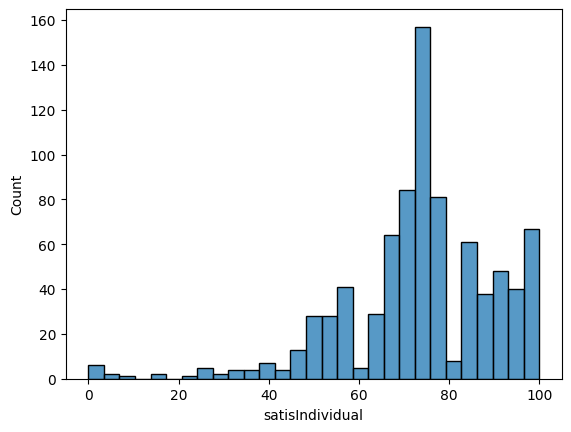

In [144]:
sns.histplot(data=datos, x="satisIndividual")

Ahora examinamos la distribución de la variable respuesta para las mujeres

C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='satisIndividual', ylabel='Count'>

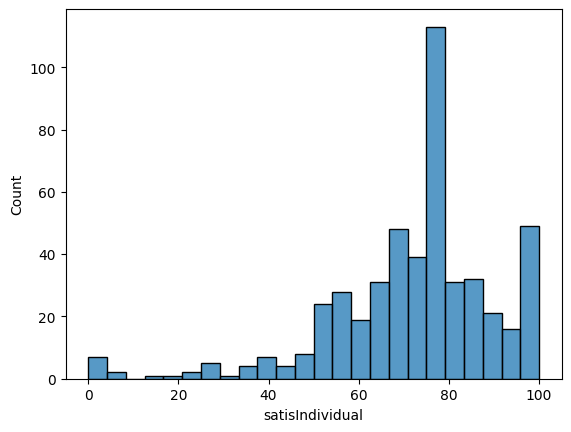

In [145]:
sns.histplot(data=datos[datos['p142']=='Femenino'], x="satisIndividual")

Ahora examinamos la distribución de la variable respuesta para los hombres

C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='satisIndividual', ylabel='Count'>

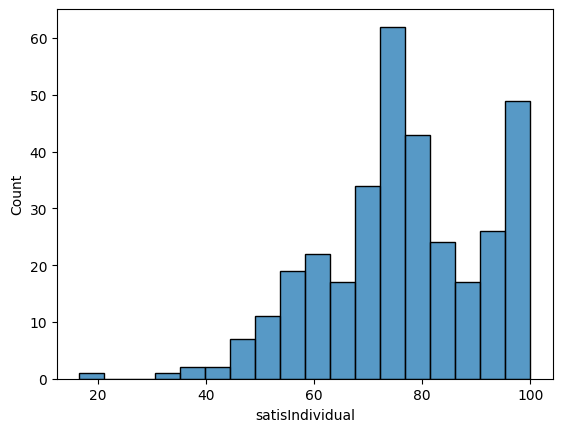

In [146]:
sns.histplot(data=datos[datos['p142']=='Masculino'], x="satisIndividual")

Considerando la distribución existente para hombres y mujeres procedemos a dicotomizar la variable usando Q1 para diferenciar a los insatisfechos de los demás. La clasificación se realiza para cada sexo por separado.

# Mujeres

In [147]:
data_mu=datos[datos['p142']=='Femenino']
data_mu= data_mu.drop('p142', axis=1)

## SVM

In [148]:
a=pd.DataFrame(data_mu.satisIndividual.quantile([0.25]))
x1=data_mu['satisIndividual']
data_mu['satisIndividual_cat'] = np.where(x1 <=  a.iloc[0,0], 1,0)
pd.value_counts(data_mu['satisIndividual_cat'])
x_train, x_test, y_train, y_test = train_test_split(data_mu.drop(['satisIndividual_cat','satisIndividual'], axis=1), 
                                                    data_mu['satisIndividual_cat'], stratify= data_mu['satisIndividual_cat'],random_state=0)

C:\Users\Uninorte\AppData\Local\Temp\ipykernel_6540\1065160567.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_mu['satisIndividual_cat'])


In [149]:
param_grid = {'svm__C': [1,10,100,1000,10000], 
              'svm__gamma': [0.0001,0.001,0.01,0.1,1],
              'svm__kernel':['linear','rbf','poly']}

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.81
Test set score: 0.758
Best parameters: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


In [150]:
#results = pd.DataFrame(grid.cv_results_)
#scores = np.array(results.mean_test_score).reshape(3,5)
#mglearn.tools.heatmap(scores, 
 #                     xlabel='gamma', 
  #                    xticklabels=param_grid['svm__gamma'], 
   #                   ylabel='C', 
    #                  yticklabels=param_grid['svm__C'], 
     #                 cmap="viridis");

In [151]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        93
           1       0.54      0.23      0.32        31

    accuracy                           0.76       124
   macro avg       0.66      0.58      0.59       124
weighted avg       0.72      0.76      0.72       124

[[87  6]
 [24  7]]


Ahora calibramos el modelo para aumentar el recall de la clase 1

In [152]:
for correcion in [-.7,-.8,-.9]:
    y_pred_lower_threshold = grid.decision_function(x_test) > correcion
    #print(confusion_matrix(y_test, y_pred_lower_threshold))
    print(mi_metric(confusion_matrix(y_test,y_pred_lower_threshold)))
    
    

(0.6129032258064516, 0.7741935483870968)
(0.7096774193548387, 0.7419354838709677)
(0.7419354838709677, 0.6989247311827957)


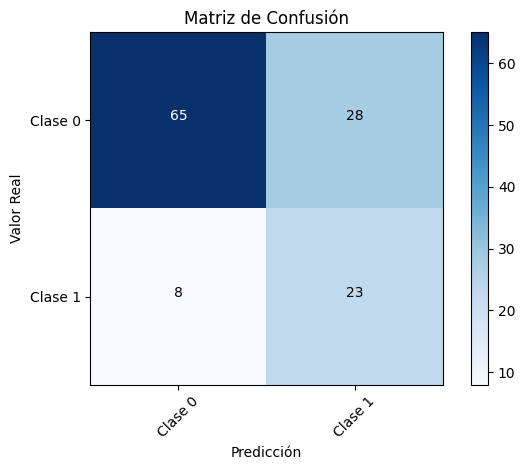

In [153]:
grid.decision_function(x_test) > -.9
plot_confu(confusion_matrix(y_test,y_pred_lower_threshold))

In [154]:
auc = roc_auc_score(y_test, grid.decision_function(x_test))
print("AUC: {:.3f}".format(auc))

AUC: 0.802


## Random Forest

In [155]:
param_grid = {'rf__n_estimators':[5,15,30,50], 
              'rf__max_features': [1,2,3,4,5]}

pipe = Pipeline([("scaler", MinMaxScaler()), ("rf", RandomForestClassifier(random_state=0))])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.82
Test set score: 0.839
Best parameters: {'rf__max_features': 2, 'rf__n_estimators': 30}


In [156]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90        93
           1       0.92      0.39      0.55        31

    accuracy                           0.84       124
   macro avg       0.88      0.69      0.72       124
weighted avg       0.85      0.84      0.81       124



In [157]:
for correcion in [.25,.3,.35]:
    y_pred_lower_threshold = grid.predict_proba(x_test)[:,1] > correcion
    #print(confusion_matrix(y_test, y_pred_lower_threshold))
    print(mi_metric(confusion_matrix(y_test,y_pred_lower_threshold)))
    

(0.7741935483870968, 0.6559139784946236)
(0.7096774193548387, 0.7634408602150538)
(0.6774193548387096, 0.7956989247311828)


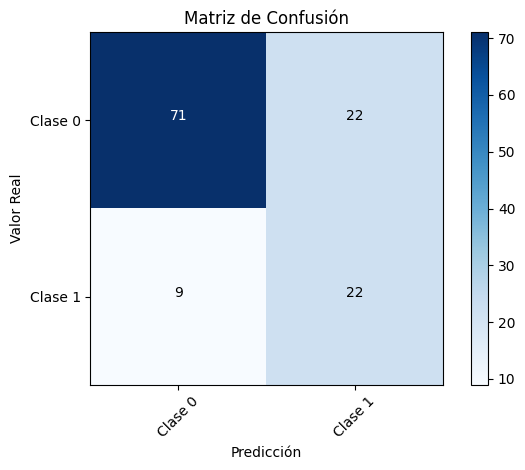

In [158]:
y_pred_lower_threshold = grid.predict_proba(x_test) > .3
plot_confu(confusion_matrix(y_test,y_pred_lower_threshold[:,1]))

In [159]:
auc = roc_auc_score(y_test, grid.predict_proba(x_test)[:,1])
print("AUC: {:.3f}".format(auc))

AUC: 0.853


## Logística

In [160]:
param_grid={'logisticregression__C': [0.1, 1, 10, 100]}

pipe = Pipeline([("scaler", MinMaxScaler()), ("logisticregression", LogisticRegression())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs = -1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.80
Test set score: 0.750
Best parameters: {'logisticregression__C': 1}


In [161]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        93
           1       0.50      0.23      0.31        31

    accuracy                           0.75       124
   macro avg       0.64      0.58      0.58       124
weighted avg       0.71      0.75      0.71       124



In [162]:
for correcion in [-.9,-1,-1.1]:
    y_pred_lower_threshold = grid.decision_function(x_test) > correcion
    #print(classification_report(y_test, y_pred_lower_threshold))
    print(mi_metric(confusion_matrix(y_test,y_pred_lower_threshold)))


(0.6774193548387096, 0.8064516129032258)
(0.7096774193548387, 0.7634408602150538)
(0.7096774193548387, 0.7419354838709677)


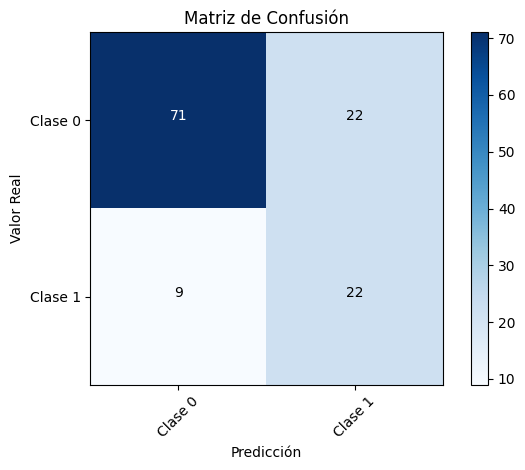

In [163]:
y_pred_lower_threshold = grid.decision_function(x_test) > -1
plot_confu(confusion_matrix(y_test,y_pred_lower_threshold))

In [164]:
auc = roc_auc_score(y_test, grid.decision_function(x_test))
print("AUC: {:.3f}".format(auc))

AUC: 0.820


## Gradient boosting

In [165]:
param_grid = {'Gradient_boosting__n_estimators': [1,5,10],
              'Gradient_boosting__gamma' : [0.1,1, 10],
              'Gradient_boosting__eta' : [0.00001,0.0001],
              'Gradient_boosting__learning_rate' : [0.1,1,10]}

pipe = Pipeline([("scaler", MinMaxScaler()),("Gradient_boosting", xgb.XGBClassifier(objective="binary:logistic",
 booster='gbtree',eval_metric="auc",seed=0))])

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs = -1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.79
Test set score: 0.798
Best parameters: {'Gradient_boosting__eta': 1e-05, 'Gradient_boosting__gamma': 10, 'Gradient_boosting__learning_rate': 1, 'Gradient_boosting__n_estimators': 5}


C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [166]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        93
           1       0.64      0.45      0.53        31

    accuracy                           0.80       124
   macro avg       0.73      0.68      0.70       124
weighted avg       0.78      0.80      0.79       124



In [167]:
for correcion in [.18,.20,.22,.23,.24]:
    y_pred_lower_threshold = grid.predict_proba(x_test)[:,1] > correcion
    #print(classification_report(y_test, y_pred_lower_threshold))
    print(mi_metric(confusion_matrix(y_test,y_pred_lower_threshold)))

(0.8387096774193549, 0.7634408602150538)
(0.8387096774193549, 0.7634408602150538)
(0.8387096774193549, 0.7634408602150538)
(0.8387096774193549, 0.7634408602150538)
(0.8387096774193549, 0.7634408602150538)


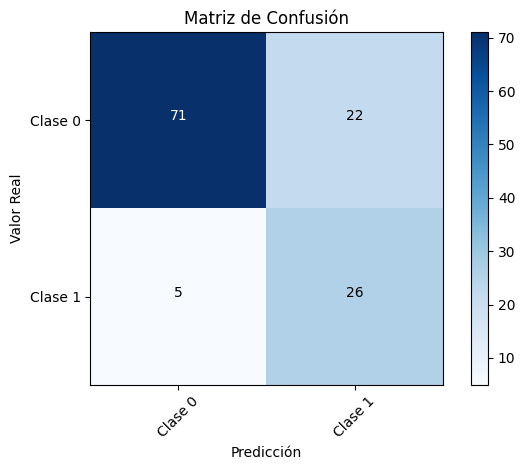

In [168]:
y_pred_lower_threshold = grid.predict_proba(x_test) > .23
plot_confu(confusion_matrix(y_test,y_pred_lower_threshold[:,1]))

In [169]:
auc = roc_auc_score(y_test, grid.predict_proba(x_test)[:,1])
print("AUC: {:.3f}".format(auc))

AUC: 0.822


## Clasificador de redes neuronales

In [170]:
param_grid = {'MLPC__hidden_layer_sizes': [40,100,200], 
              'MLPC__solver': ['lbfgs', 'sgd', 'adam'],
              'MLPC__learning_rate':['constant', 'invscaling', 'adaptive']}

pipe = Pipeline([("scaler", MinMaxScaler()), ("MLPC", MLPClassifier())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.82
Test set score: 0.766
Best parameters: {'MLPC__hidden_layer_sizes': 40, 'MLPC__learning_rate': 'invscaling', 'MLPC__solver': 'adam'}


C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [171]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        93
           1       0.60      0.19      0.29        31

    accuracy                           0.77       124
   macro avg       0.69      0.58      0.58       124
weighted avg       0.74      0.77      0.72       124



In [172]:
for correcion in [.18,.20,.22,.23,.24]:
    y_pred_lower_threshold = grid.predict_proba(x_test)[:,1] > correcion
    #print(classification_report(y_test, y_pred_lower_threshold))
    print(mi_metric(confusion_matrix(y_test,y_pred_lower_threshold)))

(0.9032258064516129, 0.6451612903225806)
(0.8064516129032258, 0.6774193548387096)
(0.7741935483870968, 0.7204301075268817)
(0.7741935483870968, 0.7311827956989247)
(0.7419354838709677, 0.7419354838709677)


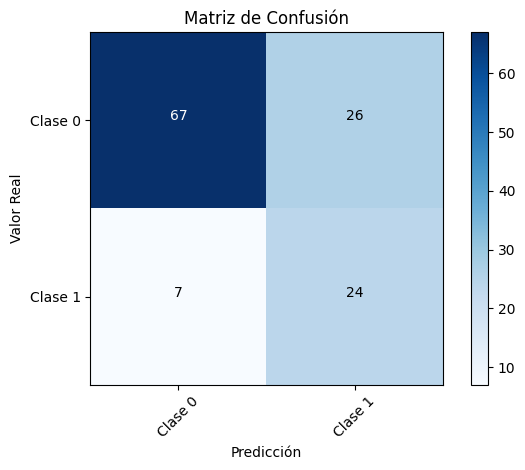

In [173]:
y_pred_lower_threshold = grid.predict_proba(x_test) > .22
plot_confu(confusion_matrix(y_test,y_pred_lower_threshold[:,1]))

In [174]:
auc = roc_auc_score(y_test, grid.predict_proba(x_test)[:,1])
print("AUC: {:.3f}".format(auc))

AUC: 0.807


## Analisis de importancia

In [175]:
param_grid = {'MLPC__hidden_layer_sizes': [40,100,200], 
              'MLPC__solver': ['lbfgs', 'sgd', 'adam'],
              'MLPC__learning_rate':['constant', 'invscaling', 'adaptive']}

pipe = Pipeline([("scaler", MinMaxScaler()), ("MLPC", MLPClassifier())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.82
Test set score: 0.758
Best parameters: {'MLPC__hidden_layer_sizes': 100, 'MLPC__learning_rate': 'adaptive', 'MLPC__solver': 'adam'}


C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 0, 'Permutation Importance')

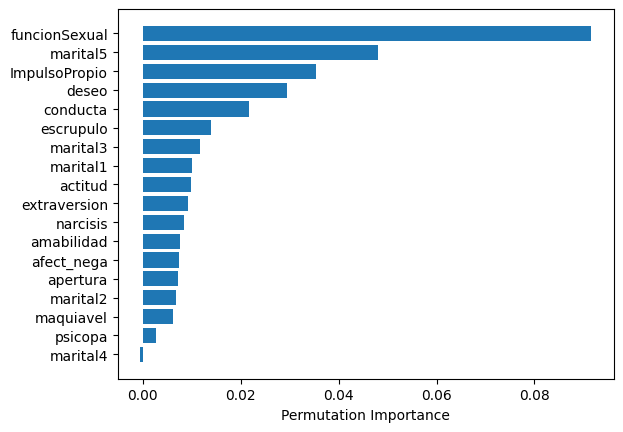

In [176]:
#random.seed(123)
perm_importance = permutation_importance(grid, x_train, y_train, n_repeats=30, random_state=123)
feature_names = x_train.columns.values

features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Hombres

In [177]:
data_ho=datos[datos['p142']=='Masculino']
data_ho= data_ho.drop('p142', axis=1)

In [178]:
a=pd.DataFrame(data_ho.satisIndividual.quantile([0.25]))
x1=data_ho['satisIndividual']
data_ho['satisIndividual_cat'] = np.where(x1 <=  a.iloc[0,0], 1,0)
pd.value_counts(data_ho['satisIndividual_cat'])
x_train, x_test, y_train, y_test = train_test_split(data_ho.drop(['satisIndividual_cat','satisIndividual'], axis=1), data_ho['satisIndividual_cat'], stratify= data_ho['satisIndividual_cat'],random_state=0)

C:\Users\Uninorte\AppData\Local\Temp\ipykernel_6540\2465038465.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_ho['satisIndividual_cat'])


## SVM

In [179]:
param_grid = {'svm__C': [10,100,1000,10000], 
              'svm__gamma': [0.0001,0.001,0.01,0.1],
              'svm__kernel':['linear','rbf','poly']}

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.75
Test set score: 0.718
Best parameters: {'svm__C': 100, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


In [180]:
#results = pd.DataFrame(grid.cv_results_)
#scores = np.array(results.mean_test_score).reshape(4,3)
#mglearn.tools.heatmap(scores, 
#                      xlabel='gamma', 
 #                     xticklabels=param_grid['svm__gamma'], 
  #                    ylabel='C', 
   #                   yticklabels=param_grid['svm__C'], 
    #                  cmap="viridis");

In [181]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

           0       0.75      0.94      0.83        64
           1       0.20      0.05      0.08        21

    accuracy                           0.72        85
   macro avg       0.47      0.49      0.46        85
weighted avg       0.61      0.72      0.65        85

[[60  4]
 [20  1]]


In [182]:
for correcion in [-1.3,-1.1,-1.07,-1]:
    y_pred_lower_threshold = grid.decision_function(x_test) > correcion
    print(mi_metric(confusion_matrix(y_test,y_pred_lower_threshold)))

(0.8571428571428571, 0.546875)
(0.7142857142857143, 0.578125)
(0.6666666666666666, 0.59375)
(0.5714285714285714, 0.65625)


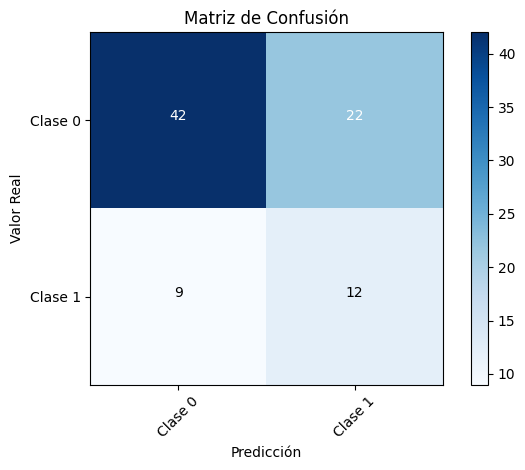

In [183]:
y_pred_lower_threshold = grid.decision_function(x_test) > -1
plot_confu(confusion_matrix(y_test,y_pred_lower_threshold))

In [184]:
auc = roc_auc_score(y_test, grid.decision_function(x_test))
print("AUC: {:.3f}".format(auc))

AUC: 0.659


## Random Forest

In [185]:
param_grid = {'rf__n_estimators':[10,20,30], 
              'rf__max_features': [3,4,5,6]}
              
pipe = Pipeline([("scaler", MinMaxScaler()), ("rf", RandomForestClassifier(random_state=0))])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.76
Test set score: 0.765
Best parameters: {'rf__max_features': 6, 'rf__n_estimators': 30}


In [186]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        64
           1       0.60      0.14      0.23        21

    accuracy                           0.76        85
   macro avg       0.69      0.56      0.55        85
weighted avg       0.73      0.76      0.71        85



In [187]:
for correcion in [.20,.23,.25,.27,.3]:
    y_pred_lower_threshold = grid.predict_proba(x_test)[:,1] > correcion
    print(mi_metric(confusion_matrix(y_test,y_pred_lower_threshold)))

(0.7619047619047619, 0.5625)
(0.7619047619047619, 0.5625)
(0.6666666666666666, 0.609375)
(0.47619047619047616, 0.75)
(0.3333333333333333, 0.8125)


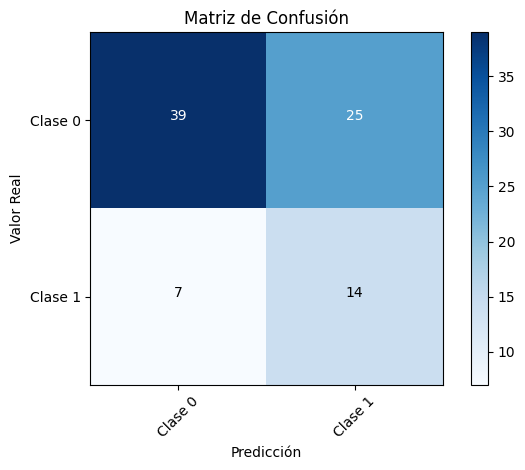

In [188]:
y_pred_lower_threshold = grid.predict_proba(x_test) > .25
plot_confu(confusion_matrix(y_test,y_pred_lower_threshold[:,1]))

In [189]:
auc = roc_auc_score(y_test, grid.predict_proba(x_test)[:, 1])
print("AUC: {:.3f}".format(auc))

AUC: 0.698


## Logistica

In [190]:
param_grid={'logisticregression__C': [0.01,0.1, 1, 10, 100,1000]}
pipe = Pipeline([("scaler", MinMaxScaler()), ("logisticregression", LogisticRegression())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs = -1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.75
Test set score: 0.788
Best parameters: {'logisticregression__C': 1}


In [191]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        64
           1       1.00      0.14      0.25        21

    accuracy                           0.79        85
   macro avg       0.89      0.57      0.56        85
weighted avg       0.83      0.79      0.72        85



In [192]:
for correcion in [-.92,-.93,-.97]:
    y_pred_lower_threshold = grid.decision_function(x_test) > correcion
    print(mi_metric(confusion_matrix(y_test,y_pred_lower_threshold)))

(0.6666666666666666, 0.78125)
(0.7142857142857143, 0.78125)
(0.7619047619047619, 0.78125)


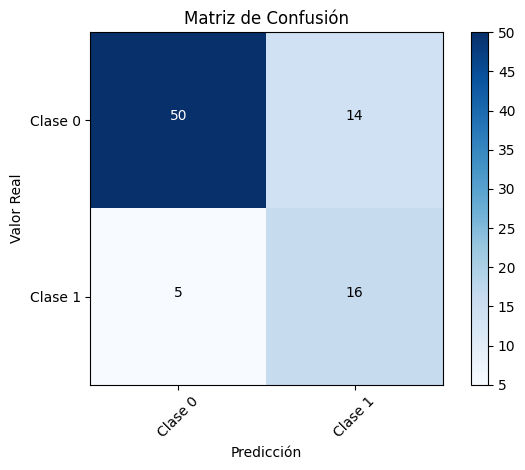

In [193]:
y_pred_lower_threshold = grid.decision_function(x_test) > -.97
plot_confu(confusion_matrix(y_test,y_pred_lower_threshold))

In [194]:
auc = roc_auc_score(y_test, grid.decision_function(x_test))
print("AUC: {:.3f}".format(auc))

AUC: 0.815


## Gradient boosting

In [195]:
param_grid = {'Gradient_boosting__n_estimators': [1,5,10],
              'Gradient_boosting__gamma' : [0.1,1, 10,100],
              'Gradient_boosting__eta' : [0.00001,0.0001],
              'Gradient_boosting__learning_rate' : [0.01]}

pipe = Pipeline([("scaler", MinMaxScaler()),("Gradient_boosting", xgb.XGBClassifier(objective="binary:logistic",
 booster='gbtree',eval_metric="auc",seed=0))])

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs = -1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.75
Test set score: 0.753
Best parameters: {'Gradient_boosting__eta': 1e-05, 'Gradient_boosting__gamma': 0.1, 'Gradient_boosting__learning_rate': 0.01, 'Gradient_boosting__n_estimators': 1}


C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [196]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        64
           1       0.00      0.00      0.00        21

    accuracy                           0.75        85
   macro avg       0.38      0.50      0.43        85
weighted avg       0.57      0.75      0.65        85



C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [197]:
for correcion in [.25,.27,.275,.28]:
    y_pred_lower_threshold = grid.predict_proba(x_test)[:,1] > correcion
    print(mi_metric(confusion_matrix(y_test,y_pred_lower_threshold)))

(1.0, 0.0)
(0.9047619047619048, 0.3125)
(0.09523809523809523, 0.96875)
(0.0, 1.0)


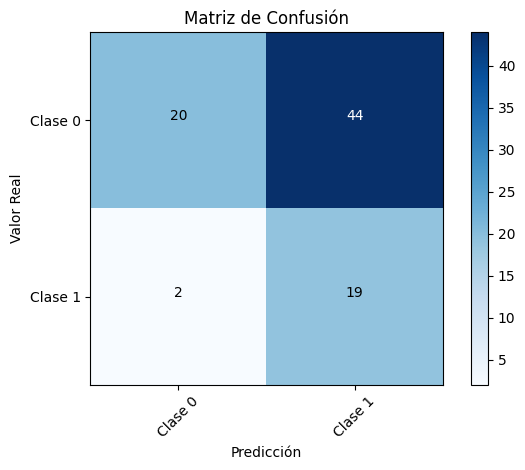

In [198]:

y_pred_lower_threshold = grid.predict_proba(x_test) > .27
plot_confu(confusion_matrix(y_test,y_pred_lower_threshold[:,1]))

In [199]:
auc = roc_auc_score(y_test, grid.predict_proba(x_test)[:, 1])
print("AUC: {:.3f}".format(auc))

AUC: 0.702


## Clasificador de redes neuronales

In [200]:
param_grid = {'MLPC__hidden_layer_sizes': [40,100,200], 
              'MLPC__solver': ['lbfgs', 'sgd', 'adam'],
              'MLPC__learning_rate':['constant', 'invscaling', 'adaptive']}

pipe = Pipeline([("scaler", MinMaxScaler()), ("MLPC", MLPClassifier(random_state=123))])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.75
Test set score: 0.800
Best parameters: {'MLPC__hidden_layer_sizes': 100, 'MLPC__learning_rate': 'constant', 'MLPC__solver': 'adam'}


C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [201]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        64
           1       0.83      0.24      0.37        21

    accuracy                           0.80        85
   macro avg       0.82      0.61      0.63        85
weighted avg       0.81      0.80      0.75        85



In [202]:
for correcion in [.20,.25,.30,.35]:
    y_pred_lower_threshold = grid.predict_proba(x_test)[:,1] > correcion
    #print(classification_report(y_test, y_pred_lower_threshold))
    print(mi_metric(confusion_matrix(y_test,y_pred_lower_threshold)))

(0.8571428571428571, 0.515625)
(0.8095238095238095, 0.75)
(0.7619047619047619, 0.8125)
(0.42857142857142855, 0.875)


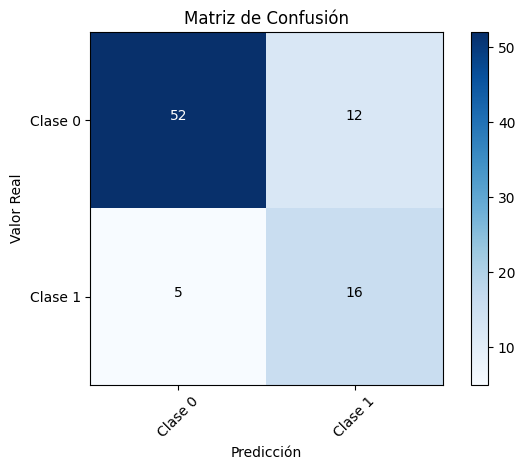

In [203]:
y_pred_lower_threshold = grid.predict_proba(x_test) > .30
plot_confu(confusion_matrix(y_test,y_pred_lower_threshold[:,1]))

In [204]:
auc = roc_auc_score(y_test, grid.predict_proba(x_test)[:,1])
print("AUC: {:.3f}".format(auc))

AUC: 0.817


## Analisis de importancia

In [205]:
param_grid = {'MLPC__hidden_layer_sizes': [40,100,200], 
              'MLPC__solver': ['lbfgs', 'sgd', 'adam'],
              'MLPC__learning_rate':['constant', 'invscaling', 'adaptive']}

pipe = Pipeline([("scaler", MinMaxScaler()), ("MLPC", MLPClassifier())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.75
Test set score: 0.776
Best parameters: {'MLPC__hidden_layer_sizes': 200, 'MLPC__learning_rate': 'adaptive', 'MLPC__solver': 'adam'}


C:\Users\Uninorte\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 0, 'Permutation Importance')

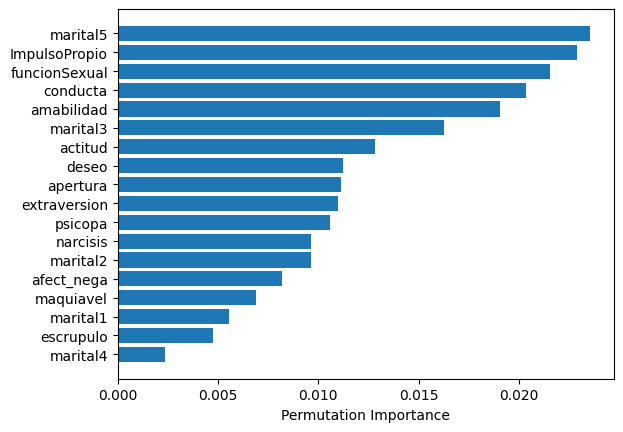

In [207]:
perm_importance = permutation_importance(grid, x_train, y_train,n_repeats=30,random_state=123)

feature_names = x_train.columns.values

features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")